In [1]:
#Importing Data from the CSV file
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import math

os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q4")
print("Path has been changed to:\n", os.getcwd())

#Importing Data X from the CSV file
#X = np.genfromtxt('q4x.dat', delimiter=[3,5])
#Importing Data Y from the CSV file
#Y = np.genfromtxt('q4y.dat', delimiter=6, dtype=str)


#More SOPHISTICATED METHOD FOR DAT FILE
X = np.loadtxt('q4x.dat')
#print(X[1:4])
Y = np.loadtxt('q4y.dat', dtype=str).reshape(-1,1)
#print(Y)

m=X.shape[0]

os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques4")
print("Path changed back to python file directory:\n", os.getcwd())

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q4
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques4


In [2]:
#Normalization of the Input X
mean = np.mean(X, axis=0).reshape(1,-1)
var = np.std(X, axis=0).reshape(1,-1)
print(mean.shape, var.shape)
X-= mean
X/= var
print(np.mean(X), np.std(X))

(1, 2) (1, 2)
1.1102230246251565e-16 0.9999999999999999


In [3]:
#GDA theta parameters
Y[Y=='Alaska']=1
Y[Y=='Canada']=0
phi = np.sum([Y=='1'])/m

index_x0=[i for i in range(len(Y)) if Y[i]=='0']
index_x1=[i for i in range(len(Y)) if Y[i]=='1']
mean_x0 = (np.mean(X[index_x0], axis=0)).reshape(1,-1)
mean_x1 = (np.mean(X[index_x1], axis=0)).reshape(1,-1)

# Old Logic for calculating Covariance matrix
# cov=np.zeros((2,2))
# for i in range(m):
#     if(Y[i]=='1'):
#         cov+=np.dot((X[i:i+1]-mean_x1).T, (X[i:i+1]-mean_x1))
#     else:
#         cov+=np.dot((X[i:i+1]-mean_x0).T, (X[i:i+1]-mean_x0))
# cov/=m

# Flag = 0 : Function "calculate_cov" returns Covariance of the Data with Labels=0 (Canada)
# Flag = 1 : Function "calculate_cov" returns Covariance of the Data with Labels=1 (Alaska)
# Flag = 0 : Function "calculate_cov" returns Equal Covariance for both labels
def calculate_cov(X, mean_x0, mean_x1, Y, flag):
    cov=np.zeros((2,2))
    cov0=np.zeros((2,2))
    cov1=np.zeros((2,2))
    m = len(X)
    even_count=0; odd_count=0
    for i in range(m):
        if(Y[i]=='1'):
            cov1+=np.dot((X[i:i+1]-mean_x1).T, (X[i:i+1]-mean_x1))
            even_count+=1
        else:
            cov0+=np.dot((X[i:i+1]-mean_x0).T, (X[i:i+1]-mean_x0))
            odd_count+=1
    cov=(cov0+cov1)/m
    cov0/=odd_count
    cov1/=even_count
    if (flag==2): return cov
    if (flag==1): return cov1
    else: return cov0

cov = calculate_cov(X, mean_x0, mean_x1, Y, 2)

In [4]:
print("Mean of the Distribution for label='Alaska' is={}".format(mean_x1))
print("Mean of the Distribution for label='Canada' is={}".format(mean_x0))
print("The value of the covariance matrix is = \n{}".format(cov))

Mean of the Distribution for label='Alaska' is=[[-0.75529433  0.68509431]]
Mean of the Distribution for label='Canada' is=[[ 0.75529433 -0.68509431]]
The value of the covariance matrix is = 
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


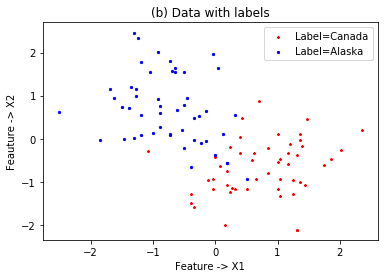

In [5]:
#Part (b)
#Plot the training data with class labels
colors=['r' if l=='0' else 'b' for l in Y]
plt.scatter(X[index_x0][:,0], X[index_x0][:,1], s = 5, marker='*', c='r',label='Label=Canada')
plt.scatter(X[index_x1][:,0], X[index_x1][:,1], s = 5, marker='o', c='b',label='Label=Alaska')
plt.legend()
plt.title('(b) Data with labels')
plt.xlabel('Feature -> X1')
plt.ylabel('Feauture -> X2')
plt.show()
#plt.savefig('data.png', dpi=1000, bbox_inches='tight')

In [7]:
#calculating linear model parameters
cov_inv = np.linalg.inv(cov)
temp = math.log(phi/(1-phi))
c = (1/2)*((np.dot(np.dot(mean_x1, cov_inv), mean_x1.T)) - (np.dot(np.dot(mean_x0, cov_inv), mean_x0.T)))
m = np.dot(cov_inv, (mean_x1-mean_x0).T)
#y = np.dot(X,m)-c
x_values = np.array([np.min(X[:, 1] -1 ), np.max(X[:, 1] +1 )]).reshape(1,-1)
y = np.dot((-1./m[0:1]),np.dot(m[1:2], x_values)) - c

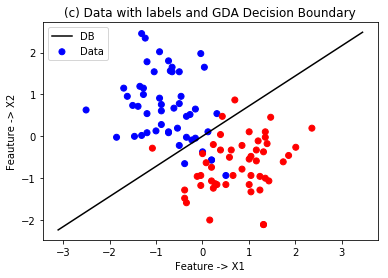

In [8]:
#Part (c)
#Plot the training data with class labels
colors=['r' if l=='0' else 'b' for l in Y]
plt.scatter(X[:,0], X[:,1], color=colors, label='Data')
plt.title('(c) Data with labels and GDA Decision Boundary')
plt.xlabel('Feature -> X1')
plt.ylabel('Feauture -> X2')
plt.plot(x_values.ravel(), y.ravel(), c='k',label='DB')
plt.legend()
plt.show()
#plt.savefig('Decision_Boundary.png', dpi=1000, bbox_inches='tight')

(500, 500)


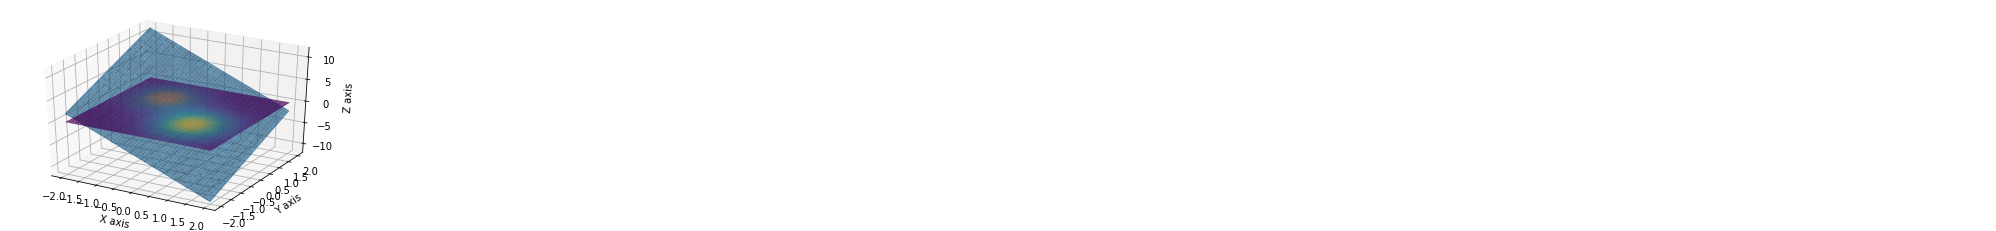

In [9]:
#visualize Gaussian of the individual distributions

#Create grid and multivariate normal
m1 = np.linspace(-2, 2,500)
m2 = np.linspace(-2, 2,500)
M1, M2 = np.meshgrid(m1,m2)
pos = np.empty(M1.shape + (2,))
pos[:, :, 0] = M1; pos[:, :, 1] = M2
rv1 = multivariate_normal(mean_x1.ravel(), cov)
rv0 = multivariate_normal(mean_x0.ravel(), cov)

#Make a 3D plot
fig = plt.figure()
y = m[0]*M1 + m[1]*M2 -c

print(y.shape)
ax = fig.gca(projection='3d')
ax.plot_surface(M1, M2, y ,linewidth=0, alpha=0.7)
ax.plot_surface(M1, M2, rv1.pdf(pos),alpha=0.5, cmap='viridis',linewidth=0)
ax.plot_surface(M1, M2, rv0.pdf(pos),alpha=0.5, cmap='viridis', linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()
#plt.savefig('temp.png', dpi=1000, bbox_inches='tight')


/home/ayushi/.local/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


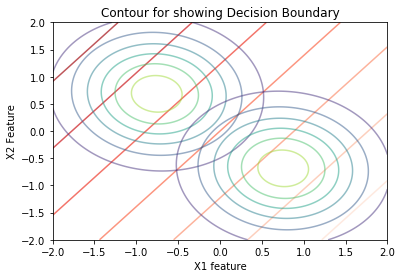

In [10]:
#Create grid and multivariate normal
m1 = np.linspace(-2, 2,500)
m2 = np.linspace(-2, 2,500)
M1, M2 = np.meshgrid(m1,m2)
pos = np.empty(M1.shape + (2,))
pos[:, :, 0] = M1; pos[:, :, 1] = M2
rv1 = multivariate_normal(mean_x1.ravel(), cov)
rv0 = multivariate_normal(mean_x0.ravel(), cov)

#Make a 3D plot
fig = plt.figure()
y = m[0]*M1 + m[1]*M2 -c

#print(y.shape)
#ax = fig.gca(projection='3d')
ax=fig.add_subplot(111)
ax.contour(M1, M2, y ,linewidth=0, alpha=0.7, cmap='Reds')
ax.contour(M1, M2, rv1.pdf(pos),alpha=0.5, cmap='viridis',linewidth=0)
ax.contour(M1, M2, rv0.pdf(pos),alpha=0.5, cmap='viridis', linewidth=0)
ax.set_xlabel('X1 feature')
ax.set_ylabel('X2 Feature')
#ax.set_zlabel('Z-axis')
ax.set_title("Contour for showing Decision Boundary")
plt.show()
#plt.savefig('4c_Contour_DB.png', dpi=1000, bbox_inches='tight')

In [26]:
# (d) Separate Covariance Matrices. 
cov0 = calculate_cov(X, mean_x0, mean_x1, Y, 0)
cov1 = calculate_cov(X, mean_x0, mean_x1, Y, 1)

print("The value of the covariance matrix for label='Alaska' is = \n{}".format(cov1))
print("The value of the covariance matrix for label='Canada' is = \n{}".format(cov0))
cov0_inv = np.linalg.inv(cov0)
cov1_inv = np.linalg.inv(cov1)

cov0_det = np.linalg.det(cov0)
cov1_det = np.linalg.det(cov1)

temp = math.log(phi/(1-phi))

x_values = np.array([np.min(X[:, 1] -1 ), np.max(X[:, 1] +1 )]).reshape(1,-1)
print(x_values.shape, mean_x0.shape, mean_x1.shape)
y = ((1/2)*((np.dot((x_values-mean_x1),np.dot(cov1_inv,(x_values-mean_x1).T)))
           - (np.dot((x_values-mean_x0), np.dot(cov0_inv, (x_values-mean_x0).T))))
     - temp 
     - math.log(math.sqrt(cov0_det)/math.sqrt(cov1_det)))
print(y.shape)
#y = np.dot((-1./m[0:1]),np.dot(m[1:2], x_values)) - c

The value of the covariance matrix for label='Alaska' is = 
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
The value of the covariance matrix for label='Canada' is = 
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]
(1, 2) (1, 2) (1, 2)
(1, 1)


In [34]:
np.dot(np.dot((x_values-mean_x1),cov1_inv),(x_values-mean_x1).T)- np.dot(np.dot((x_values-mean_x0), cov0_inv), (x_values-mean_x0).T)

array([[-76.2760146]])

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

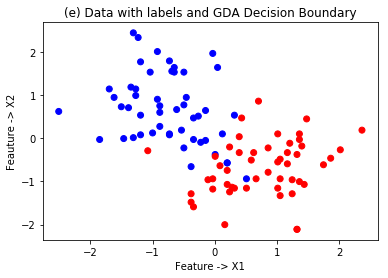

In [25]:
#Part (e)
#Plot the training data with class labels
colors=['r' if l=='0' else 'b' for l in Y]
plt.scatter(X[:,0], X[:,1], color=colors, label='Data')
plt.title('(e) Data with labels and GDA Decision Boundary')
plt.xlabel('Feature -> X1')
plt.ylabel('Feauture -> X2')
plt.plot(x_values.ravel(), y.ravel(), c='k',label='DB')
plt.legend()
plt.show()
#plt.savefig('Decision_Boundary.png', dpi=1000, bbox_inches='tight')